# **Base de datos (Test)**


Inicialmente se hace el cargue del conjunto de datos de prueba, con el uso de la librería `pandas` y el módulo **`read_parquet`** para leer el archivo en formato `Parquet`.

In [ ]:
data_prueba = pd.read_parquet('test.parquet', engine = 'pyarrow')

## **Características de la base de datos**

Inicialmente se hace uso del método `.head()` para indicar que se muestren las 5 primeras observaciones de la base de datos.

In [ ]:
data_prueba.head()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
0,295246830,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,BRD4
1,295246831,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,HSA
2,295246832,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,sEH
3,295246833,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,BRD4
4,295246834,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,HSA


Al visualizar las primeras 5 observaciones, se puede identificar un patrón claro: los valores de las variables correspondientes a los bloques de construcción y los nombres de las moléculas se repiten tres veces. Esto ocurre porque cada molécula se evalúa con los tres tipos de proteínas objetivo. 

Con el uso del método `info()` y `shape` se puede observar una visión general de las características de la base de datos.

In [ ]:
data_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674896 entries, 0 to 1674895
Data columns (total 6 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   id                     1674896 non-null  int64 
 1   buildingblock1_smiles  1674896 non-null  object
 2   buildingblock2_smiles  1674896 non-null  object
 3   buildingblock3_smiles  1674896 non-null  object
 4   molecule_smiles        1674896 non-null  object
 5   protein_name           1674896 non-null  object
dtypes: int64(1), object(5)
memory usage: 76.7+ MB


In [ ]:
data_prueba.shape

(1674896, 6)

En este caso, la base de datos de entrenamiento tiene **1,674,896** observaciones y **6 columnas** en total. Las columnas  incluyen:
- **id**: Identificador único (tipo entero).
- **buildingblock1_smiles**, **buildingblock2_smiles**, **buildingblock3_smiles**, **molecule_smiles**: Representaciones moleculares en formato SMILES (tipo cadena).
- **protein_name**: Nombre de la proteína objetivo (tipo cadena).

In [ ]:
data_prueba.describe(include = object)

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
count,1674896,1674896,1674896,1674896,1674896
unique,341,1140,1389,878022,3
top,O=C(N[C@@H]1CCN(c2cc(C(=O)O)cc(Cl)n2)C1)OCC1c2...,Nc1nc(NCc2ccc(F)cc2)ccc1[N+](=O)[O-],Cl.Cl.NCCc1nnc2c(=O)[nH]ccn12,[N-]=[N+]=NCCC[C@H](Nc1nc(NCc2cccs2)nc(Nc2noc3...,BRD4
freq,14098,14637,10323,3,558859


Al aplicar el método `describe(include = object)`, se observaron las siguientes características de las columnas categóricas:

- Las columnas `buildingblock1_smiles`, `buildingblock2_smiles`, y `buildingblock3_smiles` contienen entre **341** y **1389** representaciones moleculares únicas, con valores más frecuentes que aparecen hasta **14,637** veces.
  
- La columna **`molecule_smiles`** muestra una alta diversidad con más de **87 millones** de combinaciones únicas, aunque el valor más frecuente aparece solo **3 veces**. Lo que corresponde a que cada molécula está asociada a tres proteínas.

- En **`protein_name`**, hay **3** proteínas únicas, siendo **`BRD4`** la más común, con aproximadamente **558.859** apariciones.

In [ ]:
dataprueba_copy = data_prueba.copy()

## **Datos faltantes**

En esta parte se realiza un análisis para identificar la cantidad de datos faltantes en cada columna de la base de datos. Se utiliza la librería `missingno` para generar una visualización en forma de barra que muestra el porcentaje de datos faltantes en cada columna, ordenados de manera ascendente.

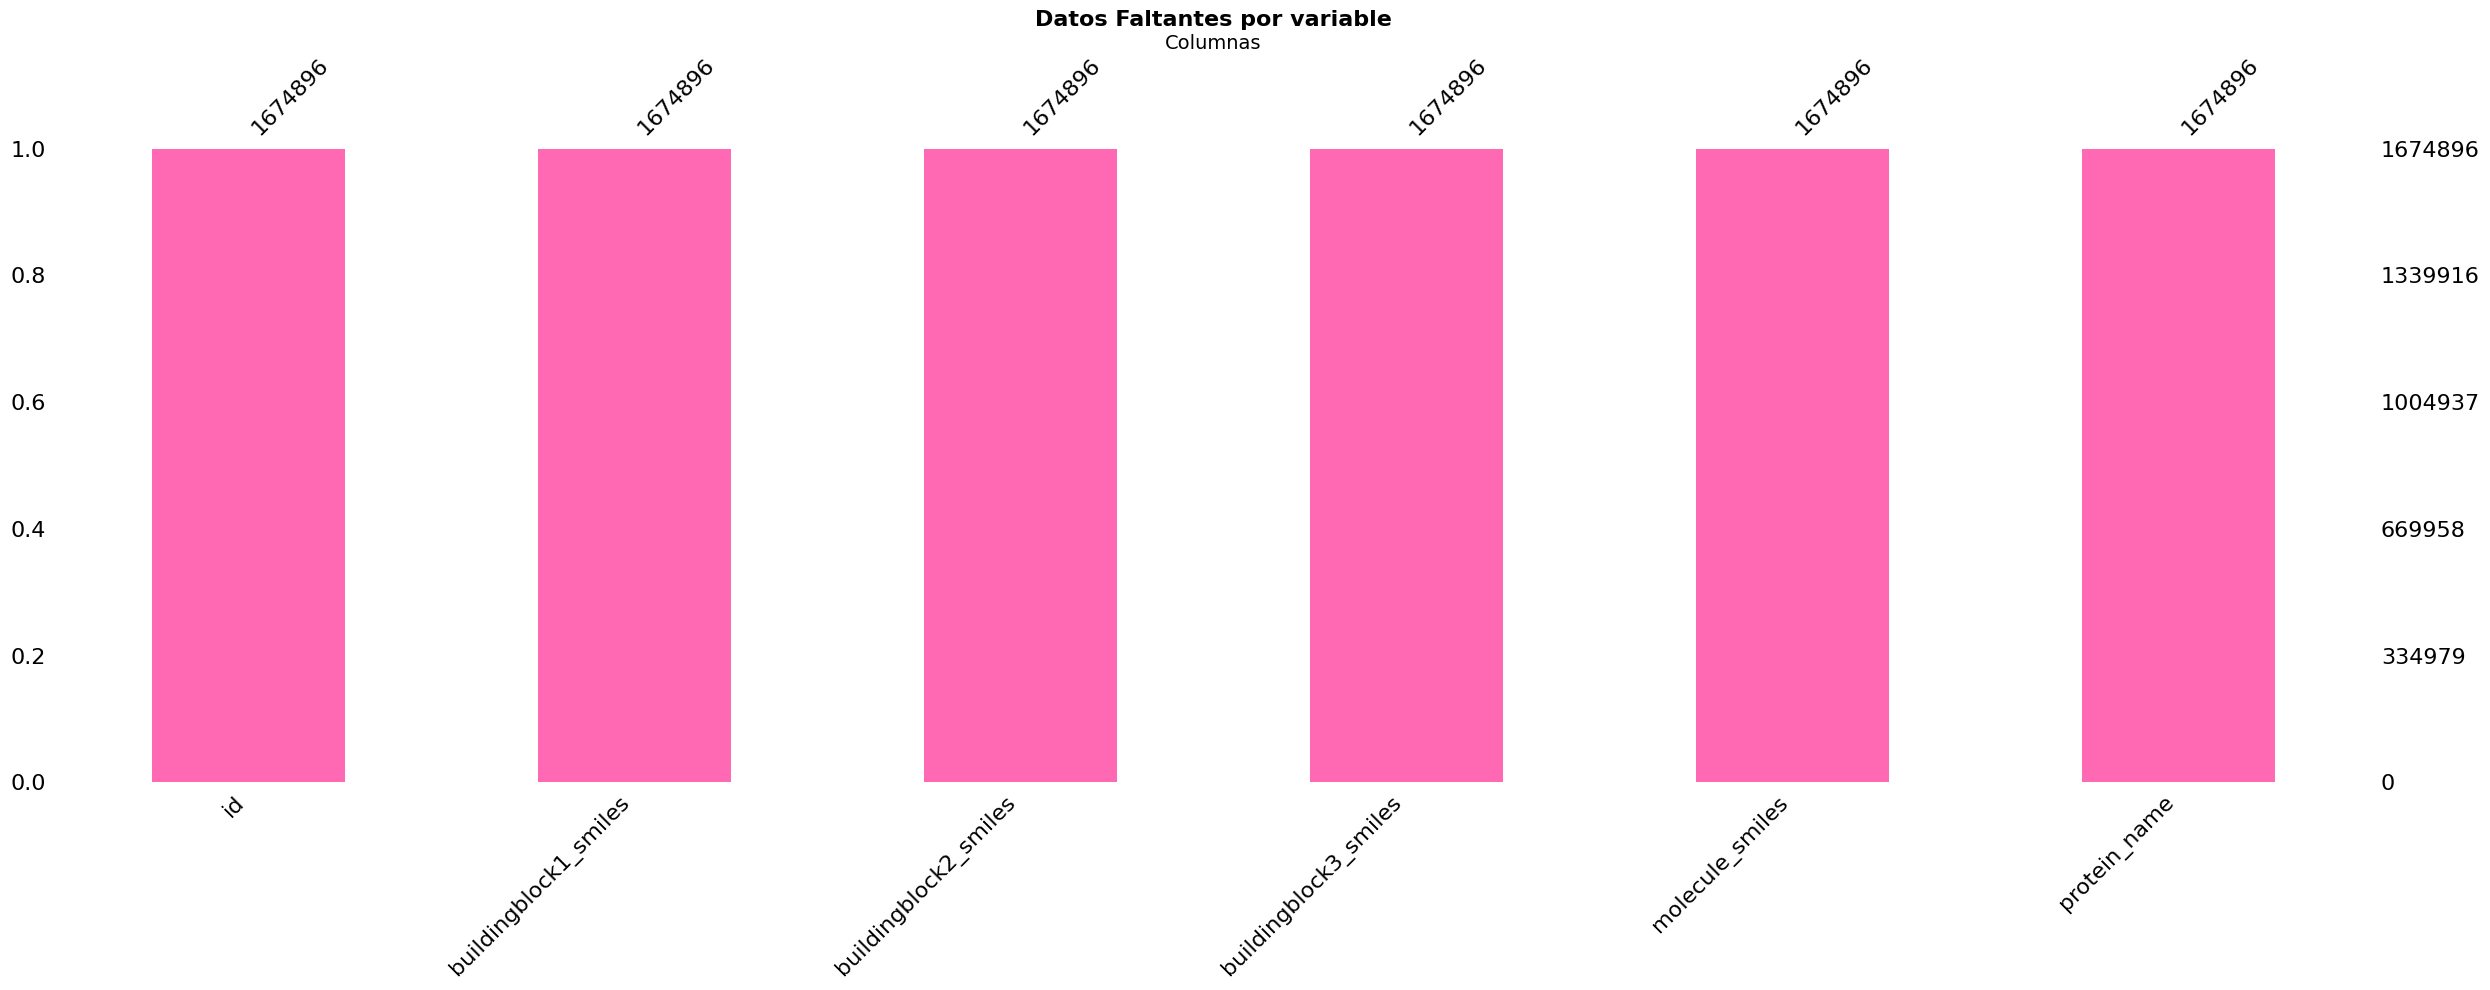

In [ ]:
msno.bar(data_prueba, color = "#FF69B4", sort = 'ascending')
plt.title('Datos Faltantes por variable', fontsize = 16, fontweight = 'bold')
plt.xlabel('Columnas', fontsize = 14)
plt.ylabel('Porcentaje de Datos Faltantes', fontsize = 14)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## **Filtración de la base de datos por proteínas**

In [ ]:
dp_proteina1 = data_prueba[data_prueba['protein_name'] == 'sEH']
dp_proteina2 = data_prueba[data_prueba['protein_name'] == 'BRD4']
dp_proteina3 = data_prueba[data_prueba['protein_name'] == 'HSA']

### **Proteína SEH (EPHX2)**

In [ ]:
dp_proteina1.head()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
2,295246832,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,sEH
5,295246835,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,sEH
8,295246838,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC1(C)CCCC1(O)CN,C#CCCC[C@H](Nc1nc(NCC2(O)CCCC2(C)C)nc(Nc2ccc(C...,sEH
11,295246841,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,COC(=O)c1cc(Cl)sc1N,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2sc(Cl)c...,sEH
14,295246844,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CSC1CCC(CN)CC1,C#CCCC[C@H](Nc1nc(NCC2CCC(SC)CC2)nc(Nc2ccc(C=C...,sEH


In [ ]:
dp_proteina1.describe(include = object)

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
count,558142,558142,558142,558142,558142
unique,341,1140,1389,558142,1
top,CC(C)(C)OC(=O)N1C[C@H](Oc2ccccc2I)C[C@@H]1C(=O)O,Nc1nc(NCc2ccc(F)cc2)ccc1[N+](=O)[O-],Cl.Cl.NCCc1nnc2c(=O)[nH]ccn12,[N-]=[N+]=NCCC[C@H](Nc1nc(NCc2cccs2)nc(Nc2noc3...,sEH
freq,4800,4879,3441,1,558142


In [ ]:
dp_proteina1.isnull().sum()

,0
id,0
buildingblock1_smiles,0
buildingblock2_smiles,0
buildingblock3_smiles,0
molecule_smiles,0
protein_name,0


In [ ]:
dp_proteina1 = dp_proteina1.reset_index()

In [ ]:
categoricas = ['protein_name', 'buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles']
p_encoder1 = OneHotEncoder(sparse_output = False)
p_encoded1 = p_encoder1.fit_transform(dp_proteina1[categoricas])
p_df_encoded1 = pd.DataFrame(p_encoded1, columns = p_encoder1.get_feature_names_out(categoricas))
p_df_proteina1 = pd.concat([dp_proteina1, p_df_encoded1], axis = 1)
p_df_proteina1 = p_df_proteina1.drop(categoricas, axis = 1)

In [ ]:
p_df_proteina1.head()

,index,id,molecule_smiles,protein_name_sEH,buildingblock1_smiles_C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_O=C(O)c1nccc(N2CCOCC2)n1,buildingblock3_smiles_O=C(O)c1nccnc1N1CCCCC1,buildingblock3_smiles_O=C(O)c1ncn(-c2ccccc2)n1,buildingblock3_smiles_O=C(O)c1ncsc1C(F)(F)F,buildingblock3_smiles_O=C(O)c1scc2c1CCCC2,buildingblock3_smiles_O=C1CC(C(=O)O)c2cccnc2N1,buildingblock3_smiles_O=C1CC2(C1)CC(C(=O)O)C2,buildingblock3_smiles_O=C1CCC(C(=O)O)CC1,buildingblock3_smiles_O=C1NC(=O)C2(CCC(C(=O)O)CC2)N1,buildingblock3_smiles_O=C1NCC(Cn2cc(C(=O)O)nn2)O1
0,2,295246832,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,295246835,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,295246838,C#CCCC[C@H](Nc1nc(NCC2(O)CCCC2(C)C)nc(Nc2ccc(C...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,295246841,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2sc(Cl)c...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,295246844,C#CCCC[C@H](Nc1nc(NCC2CCC(SC)CC2)nc(Nc2ccc(C=C...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
p_df_proteina1.shape

(558142, 2874)

In [ ]:
missing_columns1p = p_df_proteina1.isnull().sum()
missing_columns1p = missing_columns1p[missing_columns1p > 0]
print(f"Número de columnas con datos faltantes: {len(missing_columns1p)}")

Número de columnas con datos faltantes: 0


In [ ]:
p_df_proteina1.drop(columns = ['molecule_smiles'], inplace = True)
p_df_proteina1.drop(columns = ['id'], inplace = True)
p_df_proteina1.drop(columns = ['index'], inplace = True)

In [ ]:
p_df_proteina1.head()

,protein_name_sEH,buildingblock1_smiles_C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(CC=C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_O=C(O)c1nccc(N2CCOCC2)n1,buildingblock3_smiles_O=C(O)c1nccnc1N1CCCCC1,buildingblock3_smiles_O=C(O)c1ncn(-c2ccccc2)n1,buildingblock3_smiles_O=C(O)c1ncsc1C(F)(F)F,buildingblock3_smiles_O=C(O)c1scc2c1CCCC2,buildingblock3_smiles_O=C1CC(C(=O)O)c2cccnc2N1,buildingblock3_smiles_O=C1CC2(C1)CC(C(=O)O)C2,buildingblock3_smiles_O=C1CCC(C(=O)O)CC1,buildingblock3_smiles_O=C1NC(=O)C2(CCC(C(=O)O)CC2)N1,buildingblock3_smiles_O=C1NCC(Cn2cc(C(=O)O)nn2)O1
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
p_df_proteina1.shape

(558142, 2871)

### **Proteína BRD4**

In [ ]:
dp_proteina2.head()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
0,295246830,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,BRD4
3,295246833,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,BRD4
6,295246836,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC1(C)CCCC1(O)CN,C#CCCC[C@H](Nc1nc(NCC2(O)CCCC2(C)C)nc(Nc2ccc(C...,BRD4
9,295246839,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,COC(=O)c1cc(Cl)sc1N,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2sc(Cl)c...,BRD4
12,295246842,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CSC1CCC(CN)CC1,C#CCCC[C@H](Nc1nc(NCC2CCC(SC)CC2)nc(Nc2ccc(C=C...,BRD4


In [ ]:
dp_proteina2.describe(include = object)

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
count,558859,558859,558859,558859,558859
unique,341,1140,1389,558859,1
top,O=C(O)[C@@H]1C=C(c2ccc(Br)nc2)CN1C(=O)OCC1c2cc...,Nc1nc(NCc2ccc(F)cc2)ccc1[N+](=O)[O-],Cl.Cl.NCCc1nnc2c(=O)[nH]ccn12,[N-]=[N+]=NCCC[C@H](Nc1nc(NCc2cccs2)nc(Nc2noc3...,BRD4
freq,4809,4879,3441,1,558859


In [ ]:
dp_proteina2.isnull().sum()

,0
id,0
buildingblock1_smiles,0
buildingblock2_smiles,0
buildingblock3_smiles,0
molecule_smiles,0
protein_name,0


In [ ]:
dp_proteina2 = dp_proteina2.reset_index()

In [ ]:
categoricas = ['protein_name', 'buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles']
p_encoder2 = OneHotEncoder(sparse_output = False)
p_encoded2 = p_encoder2.fit_transform(dp_proteina2[categoricas])
p_df_encoded2 = pd.DataFrame(p_encoded2, columns = p_encoder2.get_feature_names_out(categoricas))
p_df_proteina2 = pd.concat([dp_proteina2, p_df_encoded2], axis = 1)
p_df_proteina2 = p_df_proteina2.drop(categoricas, axis = 1)

In [ ]:
p_df_proteina2.head()

,index,id,molecule_smiles,protein_name_BRD4,buildingblock1_smiles_C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_O=C(O)c1nccc(N2CCOCC2)n1,buildingblock3_smiles_O=C(O)c1nccnc1N1CCCCC1,buildingblock3_smiles_O=C(O)c1ncn(-c2ccccc2)n1,buildingblock3_smiles_O=C(O)c1ncsc1C(F)(F)F,buildingblock3_smiles_O=C(O)c1scc2c1CCCC2,buildingblock3_smiles_O=C1CC(C(=O)O)c2cccnc2N1,buildingblock3_smiles_O=C1CC2(C1)CC(C(=O)O)C2,buildingblock3_smiles_O=C1CCC(C(=O)O)CC1,buildingblock3_smiles_O=C1NC(=O)C2(CCC(C(=O)O)CC2)N1,buildingblock3_smiles_O=C1NCC(Cn2cc(C(=O)O)nn2)O1
0,0,295246830,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,295246833,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,295246836,C#CCCC[C@H](Nc1nc(NCC2(O)CCCC2(C)C)nc(Nc2ccc(C...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,295246839,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2sc(Cl)c...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,295246842,C#CCCC[C@H](Nc1nc(NCC2CCC(SC)CC2)nc(Nc2ccc(C=C...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
p_df_proteina2.shape

(558859, 2874)

In [ ]:
missing_columns2p = p_df_proteina2.isnull().sum()
missing_columns2p = missing_columns2p[missing_columns2p > 0]
print(f"Número de columnas con datos faltantes: {len(missing_columns2p)}")

Número de columnas con datos faltantes: 0


In [ ]:
p_df_proteina2.drop(columns = ['molecule_smiles'], inplace = True)
p_df_proteina2.drop(columns = ['id'], inplace = True)
p_df_proteina2.drop(columns = ['index'], inplace = True)

In [ ]:
p_df_proteina2.head()

,protein_name_BRD4,buildingblock1_smiles_C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(CC=C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_O=C(O)c1nccc(N2CCOCC2)n1,buildingblock3_smiles_O=C(O)c1nccnc1N1CCCCC1,buildingblock3_smiles_O=C(O)c1ncn(-c2ccccc2)n1,buildingblock3_smiles_O=C(O)c1ncsc1C(F)(F)F,buildingblock3_smiles_O=C(O)c1scc2c1CCCC2,buildingblock3_smiles_O=C1CC(C(=O)O)c2cccnc2N1,buildingblock3_smiles_O=C1CC2(C1)CC(C(=O)O)C2,buildingblock3_smiles_O=C1CCC(C(=O)O)CC1,buildingblock3_smiles_O=C1NC(=O)C2(CCC(C(=O)O)CC2)N1,buildingblock3_smiles_O=C1NCC(Cn2cc(C(=O)O)nn2)O1
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
p_df_proteina2.shape

(558859, 2871)

### **Proteína HSA (ALBA)**

In [ ]:
dp_proteina3.head()

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
1,295246831,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,HSA
4,295246834,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,HSA
7,295246837,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC1(C)CCCC1(O)CN,C#CCCC[C@H](Nc1nc(NCC2(O)CCCC2(C)C)nc(Nc2ccc(C...,HSA
10,295246840,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,COC(=O)c1cc(Cl)sc1N,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2sc(Cl)c...,HSA
13,295246843,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CSC1CCC(CN)CC1,C#CCCC[C@H](Nc1nc(NCC2CCC(SC)CC2)nc(Nc2ccc(C=C...,HSA


In [ ]:
dp_proteina3.describe(include = object)

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
count,557895,557895,557895,557895,557895
unique,341,1140,1389,557895,1
top,CC(C)(C)OC(=O)N1C[C@@H](n2cncc2Br)C[C@H]1C(=O)O,Nc1nc(NCc2ccc(F)cc2)ccc1[N+](=O)[O-],Cl.Cl.NCCc1nnc2c(=O)[nH]ccn12,[N-]=[N+]=NCCC[C@H](Nc1nc(NCc2cccs2)nc(Nc2noc3...,HSA
freq,4744,4879,3441,1,557895


In [ ]:
dp_proteina3.isnull().sum()

,0
id,0
buildingblock1_smiles,0
buildingblock2_smiles,0
buildingblock3_smiles,0
molecule_smiles,0
protein_name,0


In [ ]:
dp_proteina3 = dp_proteina3.reset_index()

In [ ]:
categoricas = ['protein_name', 'buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles']
p_encoder3 = OneHotEncoder(sparse_output = False)
p_encoded3 = p_encoder3.fit_transform(dp_proteina3[categoricas])
p_df_encoded3 = pd.DataFrame(p_encoded3, columns = p_encoder3.get_feature_names_out(categoricas))
p_df_proteina3 = pd.concat([dp_proteina3, p_df_encoded3], axis = 1)
p_df_proteina3 = p_df_proteina3.drop(categoricas, axis = 1)

In [ ]:
p_df_proteina3.head()

,index,id,molecule_smiles,protein_name_HSA,buildingblock1_smiles_C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_O=C(O)c1nccc(N2CCOCC2)n1,buildingblock3_smiles_O=C(O)c1nccnc1N1CCCCC1,buildingblock3_smiles_O=C(O)c1ncn(-c2ccccc2)n1,buildingblock3_smiles_O=C(O)c1ncsc1C(F)(F)F,buildingblock3_smiles_O=C(O)c1scc2c1CCCC2,buildingblock3_smiles_O=C1CC(C(=O)O)c2cccnc2N1,buildingblock3_smiles_O=C1CC2(C1)CC(C(=O)O)C2,buildingblock3_smiles_O=C1CCC(C(=O)O)CC1,buildingblock3_smiles_O=C1NC(=O)C2(CCC(C(=O)O)CC2)N1,buildingblock3_smiles_O=C1NCC(Cn2cc(C(=O)O)nn2)O1
0,1,295246831,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,295246834,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,295246837,C#CCCC[C@H](Nc1nc(NCC2(O)CCCC2(C)C)nc(Nc2ccc(C...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,295246840,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2sc(Cl)c...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,295246843,C#CCCC[C@H](Nc1nc(NCC2CCC(SC)CC2)nc(Nc2ccc(C=C...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
p_df_proteina3.shape

(557895, 2874)

In [ ]:
missing_columns3p = p_df_proteina3.isnull().sum()
missing_columns3p = missing_columns3p[missing_columns3p > 0]
print(f"Número de columnas con datos faltantes: {len(missing_columns3p)}")

Número de columnas con datos faltantes: 0


In [ ]:
p_df_proteina3.drop(columns = ['molecule_smiles'], inplace = True)
p_df_proteina3.drop(columns = ['id'], inplace = True)
p_df_proteina3.drop(columns = ['index'], inplace = True)

In [ ]:
p_df_proteina3.head()

,protein_name_HSA,buildingblock1_smiles_C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(CC=C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_O=C(O)c1nccc(N2CCOCC2)n1,buildingblock3_smiles_O=C(O)c1nccnc1N1CCCCC1,buildingblock3_smiles_O=C(O)c1ncn(-c2ccccc2)n1,buildingblock3_smiles_O=C(O)c1ncsc1C(F)(F)F,buildingblock3_smiles_O=C(O)c1scc2c1CCCC2,buildingblock3_smiles_O=C1CC(C(=O)O)c2cccnc2N1,buildingblock3_smiles_O=C1CC2(C1)CC(C(=O)O)C2,buildingblock3_smiles_O=C1CCC(C(=O)O)CC1,buildingblock3_smiles_O=C1NC(=O)C2(CCC(C(=O)O)CC2)N1,buildingblock3_smiles_O=C1NCC(Cn2cc(C(=O)O)nn2)O1
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
p_df_proteina3.shape

(557895, 2871)